# Stat 535 Final Project
Dongyang Wang

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

plt.style.use('seaborn-white')
%matplotlib inline

### EDA

In this section, I import the data and check its structure, missing values, and correlation.

In [2]:
df = pd.read_csv('train.txt', sep=",", header=None)

names = []
for i in range(28):
    names.append("var"+str(i))
names[0] = 'y'
df = df.set_axis(names, axis=1, inplace=False)

df.head()

,y,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27
0,0.0,0.285677,-1.285955,0.686225,1.058887,-0.225692,0.554315,-1.281101,0.091633,2.173076,...,0.784258,-1.987551,-1.187779,0.000000,0.909676,0.961231,0.991876,0.674342,1.047887,0.872043
1,0.0,0.887411,-0.087352,0.874323,2.105023,0.326296,1.482571,0.098572,-1.326010,2.173076,...,1.187827,-0.483034,0.004278,0.000000,0.903775,0.876301,0.992038,1.724632,1.361670,1.215219
2,0.0,0.841293,1.665713,1.242196,1.003515,1.503445,0.716094,-1.003359,-0.821529,0.000000,...,0.793264,0.359155,0.322242,1.550981,2.882431,1.581160,0.978527,1.041141,0.616253,1.012614
3,0.0,0.603930,0.934429,1.515743,1.095358,0.745179,1.675679,0.316171,-1.568272,1.086538,...,2.741495,-0.471540,-0.201697,0.000000,0.806935,1.242752,0.984643,1.585095,0.841350,1.486859
4,0.0,1.011674,-0.368568,-0.315957,0.456714,1.552635,0.833443,-2.239183,-1.116456,0.000000,...,1.094845,0.308493,0.500369,3.101961,1.641642,1.132767,0.989460,0.696514,1.347536,1.146125


In [3]:
# Check shape of data
df.shape

(100000, 28)

In [4]:
# Column datatypes for the training dataset
df.dtypes

y        float64
var1     float64
var2     float64
var3     float64
var4     float64
var5     float64
var6     float64
var7     float64
var8     float64
var9     float64
var10    float64
var11    float64
var12    float64
var13    float64
var14    float64
var15    float64
var16    float64
var17    float64
var18    float64
var19    float64
var20    float64
var21    float64
var22    float64
var23    float64
var24    float64
var25    float64
var26    float64
var27    float64
dtype: object

In [5]:
# Check summary statistics
df.describe()

,y,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.010040,1.023213,-0.001817,-0.001942,1.055471,0.002683,0.961741,0.003690,-0.002163,1.004700,...,0.964390,-0.003643,0.001798,0.987137,1.025243,1.016071,1.048912,1.021815,1.053562,1.055666
std,0.099696,0.627330,1.022461,1.007684,0.662435,1.012738,0.462445,1.013337,1.003622,1.026141,...,0.488097,1.028232,1.003797,1.394337,0.653770,0.359208,0.165210,0.435754,0.629504,0.393574
min,0.000000,0.274697,-2.449174,-1.742508,0.001929,-1.743910,0.148862,-2.977266,-1.741237,0.000000,...,0.365354,-2.512158,-1.742691,0.000000,0.101168,0.347654,0.267182,0.185844,0.055510,0.348774
25%,0.000000,0.580871,-0.753226,-0.879699,0.591483,-0.881892,0.653595,-0.701577,-0.868096,0.000000,...,0.610952,-0.738461,-0.864265,0.000000,0.787093,0.856428,0.985704,0.781596,0.628269,0.795649
50%,0.000000,0.862522,-0.001385,0.001526,0.928570,0.004611,0.863581,0.005407,-0.007149,1.086538,...,0.850708,0.003749,0.001503,0.000000,0.890677,0.940334,0.989780,0.907702,0.924550,0.966107
75%,0.000000,1.288201,0.747795,0.869884,1.366284,0.887634,1.151686,0.710723,0.863323,2.173076,...,1.189287,0.732928,0.867166,3.101961,1.020096,1.050522,1.018529,1.119652,1.323375,1.206942
max,1.000000,8.611493,2.450278,1.743236,9.694275,1.743129,6.704000,2.968768,1.741454,2.173076,...,6.459539,2.520563,1.743372,3.101961,22.975113,11.928769,5.990676,9.701067,13.063326,7.153054


In [6]:
# Check for null values
df.isnull().sum()

y        0
var1     0
var2     0
var3     0
var4     0
var5     0
var6     0
var7     0
var8     0
var9     0
var10    0
var11    0
var12    0
var13    0
var14    0
var15    0
var16    0
var17    0
var18    0
var19    0
var20    0
var21    0
var22    0
var23    0
var24    0
var25    0
var26    0
var27    0
dtype: int64

In [7]:
# Check the distribution of dependent variable and found only 1004 positive cases
len(df["y"][df["y"] == 1])

1004

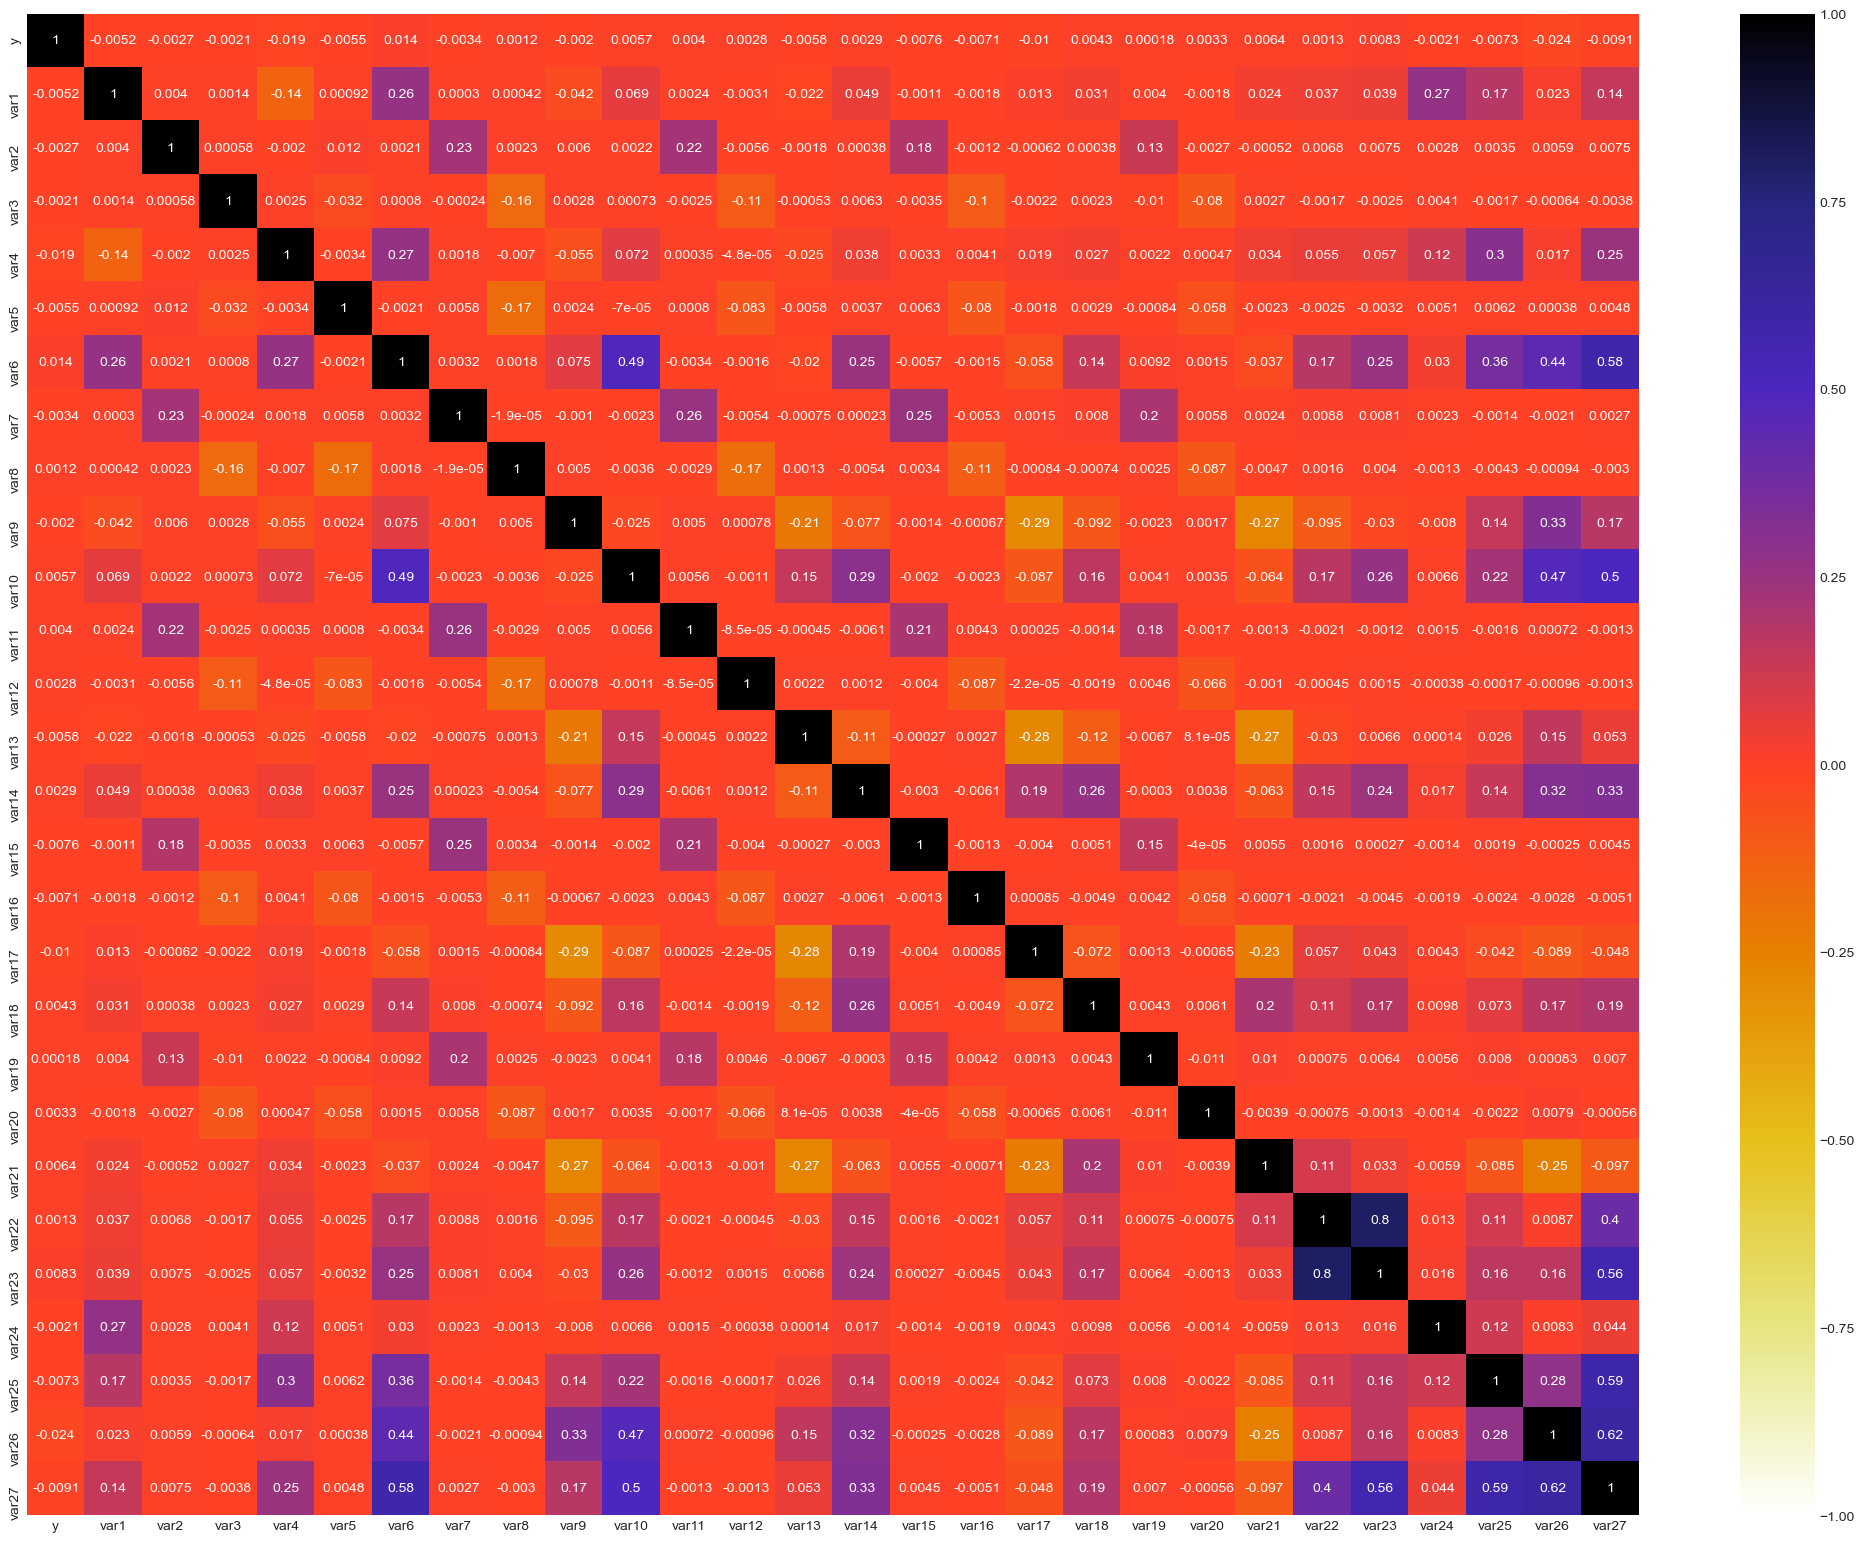

In [190]:
# Check the distribution of independent variables for correlation
plt.figure(figsize = (26, 19.5))
foo = sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap = plt.cm.CMRmap_r)

plt.savefig('foo.png')

### Modeling

Now that the data is well formatted, some traing can take place. In the following subsections, I will apply bagged decision tree and logistic regression. I will do a validation set approach on the training data, and will evaluate the performance later on the test set.

We first get the X and Y and scale the data. We also perform train-test split for the training set. So this test serves as the validation set.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
# Get X and Y
X = df.drop(['y'],axis=1)
Y = df['y']

In [11]:
# Scale X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, Y, train_size = 0.8, stratify=Y, random_state=42)

In [13]:
len(y_val[y_val == 1])

201

In [14]:
def evaluation(y, yhat):
    false_pos = 0
    false_neg = 0
    for i in range(len(y)):
        if y[i] != yhat[i]:
            if int(y[i]) == 0:
                false_neg +=1
            elif int(y[i]) == 1:
                false_pos += 100
    return (false_pos + false_neg)/len(y)

#### Model 1: Bagged Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [235]:
##################################
max_depths = [None, 6, 12, 18, 24]
estimator_num = [10, 100, 200, 500, 1000]
max_samples = [ 0.5, 0.6, 0.7, 0.8, 0.9]

y_val_res = list(y_val)
bag_accuracy = []
bag_res = []

for i in range(len(max_samples)):
    temp_acc = []
    temp_val = []
    for j in range(len(estimator_num)):
    
        bag_model = BaggingClassifier(
        base_estimator=DecisionTreeClassifier(), 
        n_estimators=estimator_num[j], 
        max_samples=max_samples[i], 
        bootstrap=True,
        random_state=42
        )

        bag_model.fit(X_train, y_train)
        y_pred = bag_model.predict(X_val)
        eval_value = evaluation(y_val_res, y_pred)
        
        temp_acc.append(bag_model.oob_score_)
        temp_val.append(eval_value)
    
    bag_accuracy.append(temp_acc)
    bag_res.append(temp_val)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:640: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:644: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = (predictions /


KeyboardInterrupt: 

In [62]:
estimator_num = [10, 200, 1000]
max_samples = [ 0.5, 0.7, 0.9]

y_val_res = list(y_val)
bag_accuracy = []
bag_res = []

for i in range(len(max_samples)):
    temp_acc = []
    temp_val = []
    for j in range(len(estimator_num)):
    
        bag_model = BaggingClassifier(
        base_estimator=DecisionTreeClassifier(), 
        n_estimators=estimator_num[j], 
        max_samples=max_samples[i], 
        bootstrap=True,
        oob_score =True,
        random_state=42
        )

        bag_model.fit(X_train, y_train)
        y_pred = bag_model.predict(X_val)
        eval_value = evaluation(y_val_res, y_pred)
        
        temp_acc.append(bag_model.oob_score_)
        temp_val.append(eval_value)
    
    bag_accuracy.append(temp_acc)
    bag_res.append(temp_val)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:747: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:753: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:747: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:753: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:747: UserWarning: Some inputs do not have OOB scores. This

In [63]:
bag_res

[[0.8401, 0.83005, 0.83], [0.7651, 0.67005, 0.69005], [0.6351, 0.495, 0.50505]]

In [64]:
bag_accuracy

[[0.9914625, 0.991275, 0.991225],
 [0.9920625, 0.9927, 0.9927875],
 [0.9920125, 0.9945, 0.99475]]

Based on the above results, I will select the case when no restriction on maximum depth is imposed on each decision tree, and use as many trees in one bag as possible. A quick check on the performance of the classifier below:

In [170]:
bag_model = BaggingClassifier(
        base_estimator=BalancedBaggingClassifier(), 
        n_estimators=200, 
        max_samples=0.9, 
        bootstrap=True,
        oob_score =True,
        random_state=42
        )

bag_model.fit(X_train, y_train)
y_pred = bag_model.predict(X_val)
eval_value = evaluation(y_val_res, y_pred)

In [171]:
y_pred = bag_model.predict(X_val)
eval_value = evaluation(y_val_res, y_pred)

In [172]:
bag_model.oob_score_

0.936

In [173]:
eval_value

0.3717

In [70]:
confusion_matrix(y_val_res, y_pred)

array([[18565,  1234],
       [   62,   139]])

In [177]:
1234/(1234+18565)

0.062326380120208094

In [178]:
62/(62+139)

0.30845771144278605

In [270]:
##################################
y_pred = bag_model.predict(X_val)
y_pred = pd.DataFrame(y_pred)
thres_df = y_pred.iloc[:, 0]

In [323]:
##################################
thres = np.arange(0.045,1,0.001)
evals = []
for i in range(len(thres)):
    temp_df = [k for k in thres_df]
    temp_df = np.where(temp_df >=  thres[i], 0, 1)
    #for j in range(len(temp_df)):
    #    if temp_df[j] >= thres[i]:
    #        temp_df[j] = 0
    #    else:
    #        temp_df[j] = 1
    pred_df = list(temp_df)
    eval_value = evaluation(y_val_res, pred_df)
    evals.append(eval_value)
            
        

In [16]:
##################################
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


In [22]:
##################################
# generate dataset
X, y = make_classification(n_samples=80000, n_features=27, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=42)
# define model
model = BalancedBaggingClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' %np.mean(scores))

model.fit(X_train, y_train)

Mean ROC AUC: 0.822


BalancedBaggingClassifier()

#### Model 2: Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [91]:
solvers = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
penalties = ["l1", "l2", "elasticnet", "none"]

In [127]:
lr_model_0 = LogisticRegressionCV(solver = 'lbfgs', class_weight= "balanced")
lr_model_1 = LogisticRegressionCV(penalty='l1', solver='liblinear', class_weight= "balanced")
lr_model_2 = LogisticRegressionCV(penalty='l2', solver='liblinear', class_weight= "balanced")
lr_model_3 = LogisticRegressionCV(penalty='elasticnet', solver='saga', l1_ratios = [0.1, 0.9], class_weight= "balanced")
lr_model_4 = LogisticRegression(penalty='none',solver = 'lbfgs', class_weight= "balanced")

In [179]:
lr_model_0.fit(X_train, y_train)
lr_model_1.fit(X_train, y_train)
lr_model_2.fit(X_train, y_train)
lr_model_3.fit(X_train, y_train)
lr_model_4.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', penalty='none')

In [130]:
confusion_matrix(y_val_res, lr_model_0.predict(X_val))

array([[11968,  7831],
       [   78,   123]])

In [131]:
evaluation(y_val_res, lr_model_0.predict(X_val))

0.78155

In [132]:
y_pred_0 = lr_model_0.predict_proba(X_val)
y_pred_0 = pd.DataFrame(y_pred_0)
thres_df_0 = y_pred_0.iloc[:, 1]

thres = np.arange(0,1,0.001)
evals_0 = []
for i in range(len(thres)):
    temp_df = [k for k in thres_df_0]
    temp_df = np.where(temp_df >=  thres[i], 1, 0)
    
    pred_df = list(temp_df)
    eval_value = evaluation(y_val_res, pred_df)
    evals_0.append(eval_value)

In [133]:
threshold_0 = thres[evals_0.index(min(evals_0))]

In [151]:
threshold_0

0.47600000000000003

In [134]:
thres_df_0 = np.where(thres_df_0 >=  threshold_0, 1, 0)
pred_df_0 = list(thres_df_0)
eval_value = evaluation(y_val_res, pred_df_0)
eval_value

0.7549

In [180]:
confusion_matrix(y_val_res, pred_df_0)

array([[10601,  9198],
       [   59,   142]])

In [181]:
9198/(9198+10601)

0.4645689176221021

In [182]:
59/(59+142)

0.2935323383084577

In [135]:
confusion_matrix(y_val_res, lr_model_1.predict(X_val))

array([[19799,     0],
       [  201,     0]])

In [136]:
evaluation(y_val_res, lr_model_1.predict(X_val))

1.005

In [137]:
confusion_matrix(y_val_res, lr_model_2.predict(X_val))

array([[11967,  7832],
       [   80,   121]])

In [138]:
evaluation(y_val_res, lr_model_2.predict(X_val))

0.7916

In [139]:
y_pred_2 = lr_model_2.predict_proba(X_val)
y_pred_2 = pd.DataFrame(y_pred_2)
thres_df_2 = y_pred_0.iloc[:, 1]

thres = np.arange(0,1,0.001)
evals_2 = []
for i in range(len(thres)):
    temp_df = [k for k in thres_df_2]
    temp_df = np.where(temp_df >=  thres[i], 1, 0)
    
    pred_df = list(temp_df)
    eval_value = evaluation(y_val_res, pred_df)
    evals_2.append(eval_value)

In [153]:
threshold_2 = thres[evals_2.index(min(evals_2))]

In [154]:
threshold_2

0.47600000000000003

In [155]:
thres_df_2 = np.where(thres_df_2 >=  threshold_2, 1, 0)
pred_df_2 = list(thres_df_2)
eval_value = evaluation(y_val_res, pred_df_2)
eval_value

0.7549

In [149]:
confusion_matrix(y_val_res, lr_model_3.predict(X_val))

array([[11930,  7869],
       [   76,   125]])

In [143]:
evaluation(y_val_res, lr_model_3.predict(X_val))

0.77345

In [144]:
confusion_matrix(y_val_res, lr_model_4.predict(X_val))

array([[11968,  7831],
       [   80,   121]])

In [145]:
evaluation(y_val_res, lr_model_4.predict(X_val))

0.79155

In [152]:
y_pred_4 = lr_model_4.predict_proba(X_val)
y_pred_4 = pd.DataFrame(y_pred_4)
thres_df_4 = y_pred_0.iloc[:, 1]

thres = np.arange(0,1,0.001)
evals_4 = []
for i in range(len(thres)):
    temp_df = [k for k in thres_df_4]
    temp_df = np.where(temp_df >=  thres[i], 1, 0)
    
    pred_df = list(temp_df)
    eval_value = evaluation(y_val_res, pred_df)
    evals_4.append(eval_value)

In [156]:
threshold_4 = thres[evals_4.index(min(evals_4))]

In [157]:
thres_df_4 = np.where(thres_df_4 >=  threshold_4, 1, 0)
pred_df_4 = list(thres_df_4)
eval_value = evaluation(y_val_res, pred_df_4)
eval_value

0.7549

### Evaluation


In [176]:
X_test_original = pd.read_csv('X_test.txt', sep=",", header=None)
X_test_original.shape

(10000, 27)

In [72]:
names = []
for i in range(27):
    names.append("var"+str(i+1))
X_test_original = X_test_original.set_axis(names, axis=1, inplace=False)

X_test_original.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27
0,0.509314,0.524052,1.641696,0.877973,1.229860,2.000060,-1.359639,-0.562635,0.000000,2.364971,...,1.982064,0.371232,0.853848,0.000000,0.979627,1.000360,0.980547,1.721015,2.629573,1.700175
1,1.366346,-0.904633,-0.185010,0.710238,-0.928879,0.648488,0.548823,1.740899,2.173076,0.757058,...,1.342634,1.300315,0.499259,0.000000,1.322162,1.053703,0.993859,1.122825,0.539219,0.758803
2,1.004537,2.111473,-0.855840,0.782528,-0.133951,0.845535,-0.734370,-0.136873,0.000000,1.008739,...,1.584337,0.769377,-1.267686,3.101961,0.922983,1.209678,0.990474,0.782112,0.711608,0.936054
3,0.993190,-0.144912,0.722291,1.357640,0.627257,1.468097,0.800967,-1.275008,2.173076,0.793570,...,0.501662,0.844262,-0.159524,3.101961,0.878063,1.383362,0.989129,0.588733,0.771962,1.006897
4,0.458621,-0.183636,-1.088882,0.616997,-1.484267,0.400782,-0.232119,0.604984,2.173076,0.991868,...,0.729735,0.841843,1.481454,3.101961,1.048518,0.896408,0.979567,0.847946,0.552014,0.581536


In [73]:
# Scale X
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test_original)

In [74]:
y_pred_bag = bag_model.predict(X_test)


In [80]:
sum(y_pred_bag)

707.0

In [163]:
y_pred_lr = lr_model_0.predict_proba(X_test)
y_pred_lr = pd.DataFrame(y_pred_lr)
y_pred_lr = y_pred_lr.iloc[:, 1]

y_pred_lr = np.where(y_pred_lr >=  threshold_0, 1, 0)

In [164]:
sum(y_pred_lr)

4713

In [183]:
with open('result_bag.txt', 'w') as f:
    f.write("0.06")
    f.write('\n')
    f.write("0.3")
    f.write('\n')
    for line in y_pred_bag:
        f.write(str(line))
        f.write('\n')

In [184]:
with open('result_lr.txt', 'w') as f:
    f.write("0.46")
    f.write('\n')
    f.write("0.29")
    f.write('\n')
    for line in y_pred_lr:
        f.write(str(line))
        f.write('\n')

Sanity Check

In [188]:
df1 = pd.read_csv('assigned_y_out.txt', sep=",", header=None)
df2 = pd.read_csv('y_out.txt', sep=",", header=None)

In [189]:
df1[df1.iloc[:, 0]>0]
df2[df2.iloc[:, 0]>=0]

,0
0,0.46
1,0.29
2,0.00
3,1.00
4,1.00
...,...
9997,0.00
9998,1.00
9999,0.00
10000,0.00
